In [1]:
##### Import All Necessity Functions for ML #####
import ast
import re
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as shc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_classif, mutual_info_regression
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix, silhouette_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score, r2_score, hinge_loss
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network  import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, BaseDecisionTree, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, VotingClassifier, VotingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from xgboost import XGBClassifier, XGBRegressor

##### Import All Necessity Functions for Deep Learning #####
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Bidirectional
from tensorflow.keras.layers import LSTM, GRU, RNN, SimpleRNN
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MSE, MAE, Hinge, Huber
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

##### Import All Necessity Functions for NLP #####
import nltk
import spacy
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

###### Download functions for nltk ######
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

###### For Audio - The libraries ######
import librosa
import librosa.display
import IPython.display as ipd

###### Ignore Warning ######
import warnings
warnings.warn('my warning')
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: UserWarning: my warning


In [2]:
####### To access the Google Drive ########
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
####### To Unzip the folder #######
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Audio Dataset/archive (21).zip", 'r')
zip_ref.extractall()
zip_ref.close()

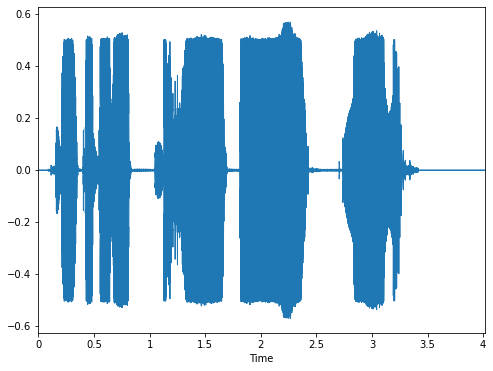

In [4]:
##### Play the audio & show the waveform #####
file_name_ = '/content/SUBESCO/F_01_OISHI_S_10_DISGUST_4.wav'
plt.figure(figsize = (8, 6))
data_, sample_rate_ = librosa.load(file_name_)
librosa.display.waveplot(data_, sr = sample_rate_)
ipd.Audio(file_name_)

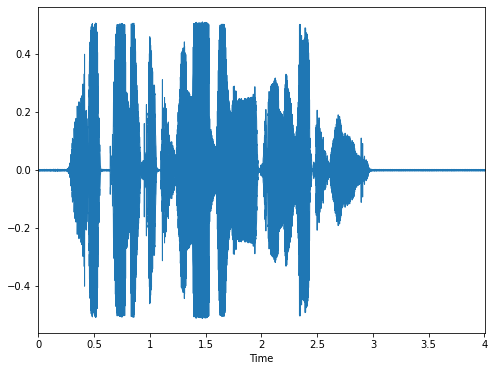

In [5]:
##### Play the audio & show the waveform #####
file_name_ = '/content/SUBESCO/F_02_MONIKA_S_3_SURPRISE_2.wav'
plt.figure(figsize = (8, 6))
data_, sample_rate_ = librosa.load(file_name_)
librosa.display.waveplot(data_, sr = sample_rate_)
ipd.Audio(file_name_)

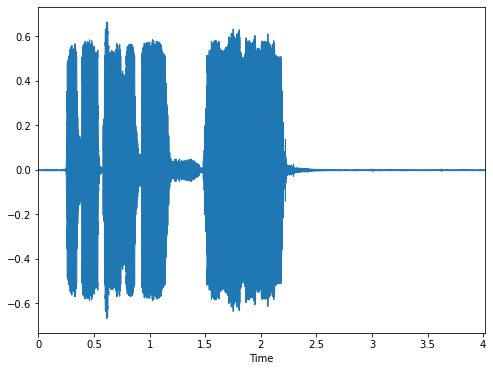

In [6]:
##### Play the audio & show the waveform #####
file_name_ = '/content/SUBESCO/F_02_MONIKA_S_6_ANGRY_2.wav'
plt.figure(figsize = (8, 6))
data_, sample_rate_ = librosa.load(file_name_)
librosa.display.waveplot(data_, sr = sample_rate_)
ipd.Audio(file_name_)

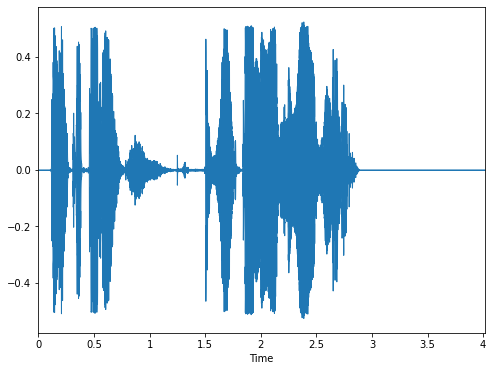

In [7]:
##### Play the audio & show the waveform #####
file_name_ = '/content/SUBESCO/F_01_OISHI_S_10_FEAR_1.wav'
plt.figure(figsize = (8, 6))
data_, sample_rate_ = librosa.load(file_name_)
librosa.display.waveplot(data_, sr = sample_rate_)
ipd.Audio(file_name_)

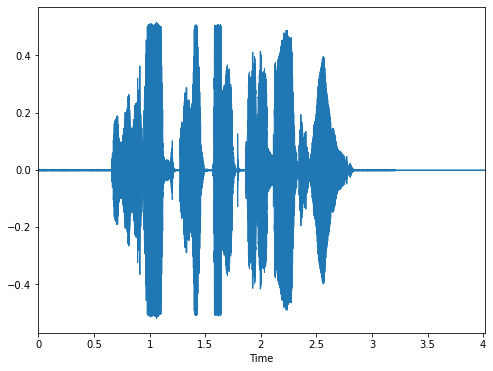

In [8]:
##### Play the audio & show the waveform #####
file_name_ = '/content/SUBESCO/F_02_MONIKA_S_2_HAPPY_4.wav'
plt.figure(figsize = (8, 6))
data_, sample_rate_ = librosa.load(file_name_)
librosa.display.waveplot(data_, sr = sample_rate_)
ipd.Audio(file_name_)

In [9]:
##### Extract all the audio file from the Google Drive #####
data_      = []
DIRECTORY_ = "/content/SUBESCO"

folder_path_ = os.path.join(DIRECTORY_)
for audio_ in os.listdir(folder_path_):
  ##### Connect with the DIRECTORY for each audio #####
  audio_path_   = os.path.join(folder_path_, audio_)
  ##### Extract the Target label #####
  target_label_ = audio_path_.split("_")[-2]
  ##### Extract the Data Array as well as the Sample Rate for each Audio #####
  data_array_, sample_rate_ = librosa.load(audio_path_)
  ##### Find the Mel Frequency Cepstral Coefficient #####
  mfcss_features_ = librosa.feature.mfcc(y = data_array_, sr = sample_rate_, n_mfcc = 50)
  ##### Normalized the Mel Frequency Cepstral Coefficient #####
  mfcss_features_ = np.mean(mfcss_features_.T, axis = 0)
  ##### Append this features along with Target Label #####
  data_.append([mfcss_features_, target_label_.lower()])

print("Completed.....")
  
##### Random shuffle the dataset #####
random.shuffle(data_)

Completed.....


In [10]:
##### Split the dataset into X and y #####
X = []
y = []

for record_ in data_:
  ##### Appending independent features into X #####
  X.append(record_[0])
  ##### Appending dependent features into y #####
  y.append(record_[1])

print("Splitting into X and y is been done.")

Splitting into X and y is been done.


In [11]:
##### Target Value Counts #####
target_value_counts_ = pd.DataFrame(y).value_counts()
target_value_counts_ 

angry       1000
disgust     1000
fear        1000
happy       1000
neutral     1000
sad         1000
surprise    1000
dtype: int64

In [12]:
##### Show the unique value of the target column #####
for dependent_ in set(y):
  print(dependent_, end = " || ")

print("\n")
print("# of unique value in target column is: ", len(set(y)))

happy || angry || disgust || surprise || sad || neutral || fear || 

# of unique value in target column is:  7


In [13]:
##### Convert X and y into numpy array #####
X = np.array(X)
y = np.array(y)

print("The shape of X is: ", X.shape,'\n')
print("The shape of y is: ", y.shape)

The shape of X is:  (7000, 50) 

The shape of y is:  (7000,)


In [14]:
##### Show X[0] to understand when we will predict for single Audio #####
print(X[0])

[-3.8937897e+02  4.7808403e+01 -7.9734020e+00  8.8023777e+00
 -3.4252458e+00 -9.1282473e+00 -6.4620905e+00 -2.5791514e+00
 -1.0047996e+01 -2.0078344e+00 -8.3904438e+00  4.3793121e-01
 -5.1015801e+00  4.6596947e+00 -2.4691629e+00 -3.4757847e-01
 -2.0342550e+00 -3.2284606e+00 -4.5959940e+00 -1.2601256e+00
 -4.5942240e+00 -2.9543883e-01 -1.6124176e+00  2.1723812e+00
 -1.0000643e+00  2.6207361e+00 -5.3958255e-01  9.0981996e-01
  6.5546757e-01  4.5882483e+00  9.5711899e-01  1.8026509e+00
 -1.3289779e+00  1.4983488e+00 -1.1105583e+00 -6.5192407e-01
 -2.6631144e-01 -8.8588469e-02  1.7508487e-01  2.1162222e-01
  5.4622638e-01  1.4043466e+00  1.0071054e+00  2.3355854e+00
  1.5004022e+00  1.8386537e+00  2.0448182e+00  9.5225507e-01
  9.4545943e-01  6.1328048e-01]


In [15]:
##### Show X[0] shape to understand when we will predict for single Audio #####
print(X[0].shape)

(50,)


In [16]:
##### Show X[0] type to understand when we will predict for single Audio #####
print(type(X[0]))

<class 'numpy.ndarray'>


In [17]:
##### Normalized the Independent Column #####
min_max_scaler_ = MinMaxScaler()
X = min_max_scaler_.fit_transform(X)

In [18]:
pd.DataFrame(y, columns = ['target']).value_counts()

target  
angry       1000
disgust     1000
fear        1000
happy       1000
neutral     1000
sad         1000
surprise    1000
dtype: int64

In [19]:
##### Label Encoding the target column - y #####
label_encoder_ = LabelEncoder()
y = label_encoder_.fit_transform(y)

print(y.shape)

(7000,)


In [20]:
##### Value counts after doing Label Encoding #####
pd.DataFrame(y, columns = ['target']).value_counts()

target
0         1000
1         1000
2         1000
3         1000
4         1000
5         1000
6         1000
dtype: int64

In [21]:
##### Train and Test split the dataset #####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print("The shape of X_train is: ", X_train.shape,'\n')
print("The shape of X_test is : ", X_test.shape,'\n')
print("The shape of y_train is: ", y_train.shape,'\n')
print("The shape of y_test is : ", y_test.shape,'\n')

The shape of X_train is:  (5250, 50) 

The shape of X_test is :  (1750, 50) 

The shape of y_train is:  (5250,) 

The shape of y_test is :  (1750,) 



USE Simple Machine Learning Algorithm to Predict the Class of Audio.

In [22]:
##### Naive Bayes Classifier #####
GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
predicted_ = GaussianNB_.predict(X_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

df = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['Naive Bayes'])

df.head()

accuracy is   =  0.41828571428571426
recall is     =  0.41066056563611747
precision is  =  0.4202055332039657
f1 score is   =  0.3969587069012312


,Naive Bayes
accuracy,0.418286
recall,0.410661
precision,0.420206
f1 score,0.396959


In [23]:
##### BernoulliNB #####
BernoulliNB_ = BernoulliNB()
BernoulliNB_.fit(X_train, y_train)
predicted_ = BernoulliNB_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

BernoulliNB_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['BernoulliNB'])

df = pd.concat([df, BernoulliNB_], axis = 1)
df.head()

accuracy is   =  0.13714285714285715
recall is     =  0.03999341672152732
precision is  =  0.1428281068524971
f1 score is   =  0.03661075766338924


,Naive Bayes,BernoulliNB
accuracy,0.418286,0.137143
recall,0.410661,0.039993
precision,0.420206,0.142828
f1 score,0.396959,0.036611


In [24]:
MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

MultinomialNB_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['MultinomialNB'])

df = pd.concat([df, MultinomialNB_], axis = 1)
df.head()

accuracy is   =  0.3902857142857143
recall is     =  0.37863044065399276
precision is  =  0.3942678137183156
f1 score is   =  0.36590196192040836


,Naive Bayes,BernoulliNB,MultinomialNB
accuracy,0.418286,0.137143,0.390286
recall,0.410661,0.039993,0.378630
precision,0.420206,0.142828,0.394268
f1 score,0.396959,0.036611,0.365902


In [25]:
##### KNearestNeighbours #####
KNeighborsClassifier_ = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
KNeighborsClassifier_.fit(X_train, y_train)
predicted_ = KNeighborsClassifier_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

KNeighborsClassifier_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['KNeighborsClassifier'])

df = pd.concat([df, KNeighborsClassifier_], axis = 1)
df.head()

accuracy is   =  0.8434285714285714
recall is     =  0.8512209506157269
precision is  =  0.8448265652201752
f1 score is   =  0.8447808520130902


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier
accuracy,0.418286,0.137143,0.390286,0.843429
recall,0.410661,0.039993,0.378630,0.851221
precision,0.420206,0.142828,0.394268,0.844827
f1 score,0.396959,0.036611,0.365902,0.844781


In [26]:
#### MLPClassifier ####
MLPClassifier_ = MLPClassifier()
MLPClassifier_.fit(X_train, y_train)
predicted_ = MLPClassifier_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

MLPClassifier_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['MLPClassifier_'])

df = pd.concat([df, MLPClassifier_], axis = 1)
df.head()

accuracy is   =  0.6588571428571428
recall is     =  0.665662445613974
precision is  =  0.6622999828955491
f1 score is   =  0.6599155107075332


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857
recall,0.410661,0.039993,0.378630,0.851221,0.665662
precision,0.420206,0.142828,0.394268,0.844827,0.662300
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916


In [27]:
#### SGD Classifier ####
SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)
predicted_ = SGDClassifier_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

SGDClassifier_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['SGDClassifier_'])

df = pd.concat([df, SGDClassifier_], axis = 1)
df.head()

accuracy is   =  0.5057142857142857
recall is     =  0.5303287412538238
precision is  =  0.5099606608498588
f1 score is   =  0.4545539278909453


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_,SGDClassifier_
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857,0.505714
recall,0.410661,0.039993,0.378630,0.851221,0.665662,0.530329
precision,0.420206,0.142828,0.394268,0.844827,0.662300,0.509961
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916,0.454554


In [28]:
#### Logistic Regression ####
LogisticRegression_ = LogisticRegression()
LogisticRegression_.fit(X_train, y_train)
predicted_ = LogisticRegression_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

LogisticRegression_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['LogisticRegression_'])

df = pd.concat([df, LogisticRegression_], axis = 1)
df.head()

accuracy is   =  0.5485714285714286
recall is     =  0.5316760660849135
precision is  =  0.5523748965898908
f1 score is   =  0.536011236369631


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_,SGDClassifier_,LogisticRegression_
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857,0.505714,0.548571
recall,0.410661,0.039993,0.378630,0.851221,0.665662,0.530329,0.531676
precision,0.420206,0.142828,0.394268,0.844827,0.662300,0.509961,0.552375
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916,0.454554,0.536011


In [29]:
#### SVM Classifier ####
SVC_ = SVC()
SVC_.fit(X_train, y_train)
predicted_ = SVC_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

SVC_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['SVC_'])

df = pd.concat([df, SVC_], axis = 1)
df.head()

accuracy is   =  0.7531428571428571
recall is     =  0.7569343249157636
precision is  =  0.7565328643418113
f1 score is   =  0.7533613764601801


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_,SGDClassifier_,LogisticRegression_,SVC_
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857,0.505714,0.548571,0.753143
recall,0.410661,0.039993,0.378630,0.851221,0.665662,0.530329,0.531676,0.756934
precision,0.420206,0.142828,0.394268,0.844827,0.662300,0.509961,0.552375,0.756533
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916,0.454554,0.536011,0.753361


In [30]:
#### Decision Tree Classifier ####
DecisionTreeClassifier_ = DecisionTreeClassifier()
DecisionTreeClassifier_.fit(X_train, y_train)
predicted_ = DecisionTreeClassifier_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

DecisionTreeClassifier_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['DecisionTreeClassifier_'])

df = pd.concat([df, DecisionTreeClassifier_], axis = 1)
df.head()

accuracy is   =  0.524
recall is     =  0.5236695134958792
precision is  =  0.5251965394797995
f1 score is   =  0.5242717057109234


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_,SGDClassifier_,LogisticRegression_,SVC_,DecisionTreeClassifier_
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857,0.505714,0.548571,0.753143,0.524000
recall,0.410661,0.039993,0.378630,0.851221,0.665662,0.530329,0.531676,0.756934,0.523670
precision,0.420206,0.142828,0.394268,0.844827,0.662300,0.509961,0.552375,0.756533,0.525197
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916,0.454554,0.536011,0.753361,0.524272


In [31]:
#### Random Forest Classifier ####
RandomForestClassifier_ = RandomForestClassifier(n_estimators = 500)
RandomForestClassifier_.fit(X_train, y_train)
predicted_ = RandomForestClassifier_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

RandomForestClassifier_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['RF'])

df = pd.concat([df, RandomForestClassifier_], axis = 1)
df.head()

accuracy is   =  0.8268571428571428
recall is     =  0.8289586685489694
precision is  =  0.8289162961284603
f1 score is   =  0.8259267217705404


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_,SGDClassifier_,LogisticRegression_,SVC_,DecisionTreeClassifier_,RF
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857,0.505714,0.548571,0.753143,0.524000,0.826857
recall,0.410661,0.039993,0.378630,0.851221,0.665662,0.530329,0.531676,0.756934,0.523670,0.828959
precision,0.420206,0.142828,0.394268,0.844827,0.662300,0.509961,0.552375,0.756533,0.525197,0.828916
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916,0.454554,0.536011,0.753361,0.524272,0.825927


In [32]:
#### Gradient Boosting Classifier ####
GradientBoostingClassifier_ = GradientBoostingClassifier()
GradientBoostingClassifier_.fit(X_train, y_train)
predicted_ = GradientBoostingClassifier_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

GradientBoostingClassifier_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['GB'])

df = pd.concat([df, GradientBoostingClassifier_], axis = 1)
df.head()

accuracy is   =  0.6971428571428572
recall is     =  0.6967230216560951
precision is  =  0.6999115320111605
f1 score is   =  0.6963785061225837


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_,SGDClassifier_,LogisticRegression_,SVC_,DecisionTreeClassifier_,RF,GB
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857,0.505714,0.548571,0.753143,0.524000,0.826857,0.697143
recall,0.410661,0.039993,0.378630,0.851221,0.665662,0.530329,0.531676,0.756934,0.523670,0.828959,0.696723
precision,0.420206,0.142828,0.394268,0.844827,0.662300,0.509961,0.552375,0.756533,0.525197,0.828916,0.699912
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916,0.454554,0.536011,0.753361,0.524272,0.825927,0.696379


In [33]:
#### Adaboost Classifier ####
AdaBoostClassifier_ = AdaBoostClassifier()
AdaBoostClassifier_.fit(X_train, y_train)
predicted_ = AdaBoostClassifier_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

AdaBoostClassifier_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['Adaboost'])

df = pd.concat([df, AdaBoostClassifier_], axis = 1)
df.head()

accuracy is   =  0.4
recall is     =  0.3917780585731191
precision is  =  0.40239071412608335
f1 score is   =  0.3854328497513015


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_,SGDClassifier_,LogisticRegression_,SVC_,DecisionTreeClassifier_,RF,GB,Adaboost
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857,0.505714,0.548571,0.753143,0.524000,0.826857,0.697143,0.400000
recall,0.410661,0.039993,0.378630,0.851221,0.665662,0.530329,0.531676,0.756934,0.523670,0.828959,0.696723,0.391778
precision,0.420206,0.142828,0.394268,0.844827,0.662300,0.509961,0.552375,0.756533,0.525197,0.828916,0.699912,0.402391
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916,0.454554,0.536011,0.753361,0.524272,0.825927,0.696379,0.385433


In [34]:
#### Xgboost Classifier ####
XGBClassifier_ = XGBClassifier()
XGBClassifier_.fit(X_train, y_train)
predicted_ = XGBClassifier_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

XGBClassifier_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['XGBClassifier'])

df = pd.concat([df, XGBClassifier_], axis = 1)
df.head()

accuracy is   =  0.6434285714285715
recall is     =  0.6397453943998486
precision is  =  0.6464848104923799
f1 score is   =  0.6385296147082149


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_,SGDClassifier_,LogisticRegression_,SVC_,DecisionTreeClassifier_,RF,GB,Adaboost,XGBClassifier
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857,0.505714,0.548571,0.753143,0.524000,0.826857,0.697143,0.400000,0.643429
recall,0.410661,0.039993,0.378630,0.851221,0.665662,0.530329,0.531676,0.756934,0.523670,0.828959,0.696723,0.391778,0.639745
precision,0.420206,0.142828,0.394268,0.844827,0.662300,0.509961,0.552375,0.756533,0.525197,0.828916,0.699912,0.402391,0.646485
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916,0.454554,0.536011,0.753361,0.524272,0.825927,0.696379,0.385433,0.638530


In [35]:
#### Stacking and Blending ####
estimators_ = [('KNN',  KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)), ('RF' ,  RandomForestClassifier(n_estimators = 500))]
StackingClassifier_ = StackingClassifier(estimators = estimators_, final_estimator = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1), cv = 5)

StackingClassifier_.fit(X_train, y_train)
predicted_ = StackingClassifier_.predict(X_test)
accuracy_score(predicted_, y_test)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'macro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'macro'))

StackingClassifier_ = pd.DataFrame([accuracy_score(predicted_, y_test),
                   recall_score(predicted_, y_test, average = 'macro'), 
                   precision_score(predicted_, y_test, average = 'macro'),
                   f1_score(predicted_, y_test, average = 'macro')], 
                   index = ['accuracy', 'recall', 'precision', 'f1 score'],
                   columns = ['StackingClassifier'])

df = pd.concat([df, StackingClassifier_], axis = 1)
df.head()

accuracy is   =  0.8651428571428571
recall is     =  0.8680603975808563
precision is  =  0.866349904712765
f1 score is   =  0.8666987213776048


,Naive Bayes,BernoulliNB,MultinomialNB,KNeighborsClassifier,MLPClassifier_,SGDClassifier_,LogisticRegression_,SVC_,DecisionTreeClassifier_,RF,GB,Adaboost,XGBClassifier,StackingClassifier
accuracy,0.418286,0.137143,0.390286,0.843429,0.658857,0.505714,0.548571,0.753143,0.524000,0.826857,0.697143,0.400000,0.643429,0.865143
recall,0.410661,0.039993,0.378630,0.851221,0.665662,0.530329,0.531676,0.756934,0.523670,0.828959,0.696723,0.391778,0.639745,0.868060
precision,0.420206,0.142828,0.394268,0.844827,0.662300,0.509961,0.552375,0.756533,0.525197,0.828916,0.699912,0.402391,0.646485,0.866350
f1 score,0.396959,0.036611,0.365902,0.844781,0.659916,0.454554,0.536011,0.753361,0.524272,0.825927,0.696379,0.385433,0.638530,0.866699


In [36]:
"""
Among all the ML algorithms, we are getting to know that Stack and Blending alogirthm is the best to predict the model.
"""
estimators_ = [('KNN',  KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)), ('RF' ,  RandomForestClassifier(n_estimators = 500))]
StackingClassifier_ = StackingClassifier(estimators = estimators_, final_estimator = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1), cv = 5)

StackingClassifier_.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('KNN',
                                KNeighborsClassifier(n_jobs=-1, n_neighbors=3)),
                               ('RF',
                                RandomForestClassifier(n_estimators=500))],
                   final_estimator=KNeighborsClassifier(n_jobs=-1,
                                                        n_neighbors=3))

In [37]:
#### Now PREDICT for Single AUDIO ####
file_name_ = '/content/SUBESCO/F_02_MONIKA_S_8_SURPRISE_1.wav'
audio_data_, sample_rate_ = librosa.load(file_name_)
mfcss_features_ = librosa.feature.mfcc(y = audio_data_, sr = sample_rate_, n_mfcc = 50)
mfcss_features_ = np.mean(mfcss_features_.T, axis = 0)
mfcss_features_ = mfcss_features_.reshape(1, -1)
mfcss_features_ = min_max_scaler_.transform(mfcss_features_)
y_pred = StackingClassifier_.predict(mfcss_features_)
if y_pred[0] == 0:
  print("The voice is ANGRY.")
elif y_pred[0] == 1:
  print("The voice is DISGUST.")
elif y_pred[0] == 2:
  print("The voice is FEAR.")
elif y_pred[0] == 3:
  print("The voice is HAPPY.")
elif y_pred[0] == 4:
  print("The voice is NEUTRAL.")
elif y_pred[0] == 5:
  print("The voice is SAD.")
elif y_pred[0] == 6:
  print("The voice is SURPRISE.")

The voice is SURPRISE.


USE Shallow Neural Network To predict the MODEL.

In [79]:
##### Split the dataset into X and y #####
X = []
y = []

for record_ in data_:
  ##### Appending independent features into X #####
  X.append(record_[0])
  ##### Appending dependent features into y #####
  y.append(record_[1])

print("Splitting into X and y is been done.")

Splitting into X and y is been done.


In [80]:
##### Convert X and y into numpy array #####
X = np.array(X)
y = np.array(y)

print("The shape of X is: ", X.shape,'\n')
print("The shape of y is: ", y.shape)

The shape of X is:  (7000, 50) 

The shape of y is:  (7000,)


In [81]:
##### Normalized the Independent Column #####
standard_scaler_ = StandardScaler()
X = standard_scaler_.fit_transform(X)

In [82]:
##### Label Encoding the target column - y #####
label_encoder_ = LabelEncoder()
y = label_encoder_.fit_transform(y)

print(y.shape)

(7000,)


In [83]:
##### Train and Test split the dataset #####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print("The shape of X_train is: ", X_train.shape,'\n')
print("The shape of X_test is : ", X_test.shape,'\n')
print("The shape of y_train is: ", y_train.shape,'\n')
print("The shape of y_test is : ", y_test.shape,'\n')

The shape of X_train is:  (5600, 50) 

The shape of X_test is :  (1400, 50) 

The shape of y_train is:  (5600,) 

The shape of y_test is :  (1400,) 



In [84]:
####### Create a model #########
model = Sequential()

####### Create a input layer #######
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = HeNormal(), input_dim = X.shape[1]))
model.add(Dropout(0.2))

####### Create a hidden layer ########
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = HeNormal()))
model.add(Dropout(0.4))

####### Create a hidden layer ########
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = HeNormal()))
model.add(Dropout(0.5))



####### Create the output layer ########
model.add(Dense(units = 7, activation = 'softmax'))

####### compile the model ########
model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

####### fit the model ########
history_ = model.fit(x = X_train, y = y_train, batch_size = 32, validation_data = (X_test, y_test), epochs = 250, verbose = 1)

Epoch 1/250
175/175 [==============================] - 1s 3ms/step - loss: 2.1787 - accuracy: 0.1627 - val_loss: 1.8746 - val_accuracy: 0.2543
Epoch 2/250
175/175 [==============================] - 0s 3ms/step - loss: 1.8816 - accuracy: 0.2154 - val_loss: 1.7830 - val_accuracy: 0.3307
Epoch 3/250
175/175 [==============================] - 0s 3ms/step - loss: 1.8176 - accuracy: 0.2405 - val_loss: 1.6816 - val_accuracy: 0.3950
Epoch 4/250
175/175 [==============================] - 0s 3ms/step - loss: 1.7346 - accuracy: 0.2887 - val_loss: 1.5818 - val_accuracy: 0.4186
Epoch 5/250
175/175 [==============================] - 0s 3ms/step - loss: 1.6697 - accuracy: 0.3127 - val_loss: 1.4899 - val_accuracy: 0.4557
Epoch 6/250
175/175 [==============================] - 0s 3ms/step - loss: 1.5919 - accuracy: 0.3516 - val_loss: 1.3951 - val_accuracy: 0.4807
Epoch 7/250
175/175 [==============================] - 0s 3ms/step - loss: 1.5359 - accuracy: 0.3736 - val_loss: 1.3492 - val_accuracy: 0.5243

In [91]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis = 1)
###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'macro'))
print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'macro'))

accuracy is   =  0.8157142857142857
recall is     =  0.8304418337032321
precision is  =  0.8181606325407336
f1 score is   =  0.8215385682051022


In [137]:
shallow_NN_ = pd.DataFrame([accuracy_score(y_pred_bool, y_test),
              recall_score(y_pred_bool, y_test, average = 'macro'),
              precision_score(y_pred_bool, y_test, average = 'macro'),
              f1_score(y_pred_bool, y_test, average = 'macro')],
              index = ["Accuracy", "Recall", "Precision", "F1 Score"],
              columns = ['Shallow Neural Network'])

shallow_NN_.head()

,Shallow Neural Network
Accuracy,0.815714
Recall,0.830442
Precision,0.818161
F1 Score,0.821539


In [133]:
#### Now PREDICT for Single AUDIO ####
file_name_ = '/content/SUBESCO/F_03_SMITA_S_4_ANGRY_1.wav'
audio_data_, sample_rate_ = librosa.load(file_name_, res_type = 'kaiser_fast')
mfcss_features_ = librosa.feature.mfcc(y = audio_data_, sr = sample_rate_, n_mfcc = 50)
mfcss_features_ = np.mean(mfcss_features_.T, axis = 0)
mfcss_features_ = mfcss_features_.reshape(1, -1)
mfcss_features_ = min_max_scaler_.transform(mfcss_features_)
y_pred = model.predict(mfcss_features_)
y_pred = np.argmax(y_pred, axis = 1)
if y_pred[0] == 0:
  print("The voice is ANGRY.")
elif y_pred[0] == 1:
  print("The voice is DISGUST.")
elif y_pred[0] == 2:
  print("The voice is FEAR.")
elif y_pred[0] == 3:
  print("The voice is HAPPY.")
elif y_pred[0] == 4:
  print("The voice is NEUTRAL.")
elif y_pred[0] == 5:
  print("The voice is SAD.")
elif y_pred[0] == 6:
  print("The voice is SURPRISE.")

The voice is ANGRY.


Using LSTM RNN to Predict The MODEL.

In [172]:
##### Split the dataset into X and y #####
X = []
y = []

for record_ in data_:
  ##### Appending independent features into X #####
  X.append(record_[0])
  ##### Appending dependent features into y #####
  y.append(record_[1])

print("Splitting into X and y is been done.")

Splitting into X and y is been done.


In [173]:
##### Convert X and y into numpy array #####
X = np.array(X)
y = np.array(y)

print("The shape of X is: ", X.shape,'\n')
print("The shape of y is: ", y.shape)

The shape of X is:  (7000, 50) 

The shape of y is:  (7000,)


In [174]:
##### Normalized the Independent Column #####
standard_scaler_ = StandardScaler()
X = standard_scaler_.fit_transform(X)

In [175]:
##### Label Encoding the target column - y #####
label_encoder_ = LabelEncoder()
y = label_encoder_.fit_transform(y)

print(y.shape)

(7000,)


In [176]:
##### Train and Test split the dataset #####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

print("The shape of X_train is: ", X_train.shape,'\n')
print("The shape of X_test is : ", X_test.shape,'\n')
print("The shape of y_train is: ", y_train.shape,'\n')
print("The shape of y_test is : ", y_test.shape,'\n')

The shape of X_train is:  (5600, 50) 

The shape of X_test is :  (1400, 50) 

The shape of y_train is:  (5600,) 

The shape of y_test is :  (1400,) 



In [177]:
# mfcss_features_ = mfcss_features_.reshape(1, -1)
# y_pred = model.predict(mfcss_features_)
# y_pred_bool = np.argmax(y_pred, axis = 1)
# y_pred_bool

In [185]:
##### Create a model #####
model = Sequential()

##### Create an LSTM with 150 neurons #####
model.add(LSTM(units = 250, input_shape = (50, 1)))
model.add(Dropout(0.3))

##### Create an Dense Layer with 128 neurons #####
model.add(Dense(units = 64, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.4))

##### Create an Dense Layer with 128 neurons #####
model.add(Dense(units = 64, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.6))


##### Create an output layer #####
model.add(Dense(units = len(set(y)), activation = 'softmax'))

##### Compile the model #####
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

##### Fit the model and run #####
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
175/175 [==============================] - 4s 10ms/step - loss: 1.8816 - accuracy: 0.2048 - val_loss: 1.7673 - val_accuracy: 0.2671
Epoch 2/100
175/175 [==============================] - 1s 7ms/step - loss: 1.7734 - accuracy: 0.2480 - val_loss: 1.7168 - val_accuracy: 0.2743
Epoch 3/100
175/175 [==============================] - 1s 7ms/step - loss: 1.7341 - accuracy: 0.2673 - val_loss: 1.6584 - val_accuracy: 0.3229
Epoch 4/100
175/175 [==============================] - 1s 7ms/step - loss: 1.6790 - accuracy: 0.2995 - val_loss: 1.5934 - val_accuracy: 0.3336
Epoch 5/100
175/175 [==============================] - 1s 7ms/step - loss: 1.6813 - accuracy: 0.2912 - val_loss: 1.5751 - val_accuracy: 0.3643
Epoch 6/100
175/175 [==============================] - 1s 7ms/step - loss: 1.6501 - accuracy: 0.3300 - val_loss: 1.5890 - val_accuracy: 0.3500
Epoch 7/100
175/175 [==============================] - 1s 7ms/step - loss: 1.6203 - accuracy: 0.3398 - val_loss: 1.5902 - val_accuracy: 0.353

In [186]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis = 1)
###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'macro'))
print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'macro'))

accuracy is   =  0.7221428571428572
recall is     =  0.7264967290032134
precision is  =  0.7221428571428571
f1 score is   =  0.7231848544441242


In [187]:
LSTM_ = pd.DataFrame([accuracy_score(y_pred_bool, y_test),
              recall_score(y_pred_bool, y_test, average = 'macro'),
              precision_score(y_pred_bool, y_test, average = 'macro'),
              f1_score(y_pred_bool, y_test, average = 'macro')],
              index = ["Accuracy", "Recall", "Precision", "F1 Score"],
              columns = ['LSTM'])

LSTM_.head()

,LSTM
Accuracy,0.722143
Recall,0.726497
Precision,0.722143
F1 Score,0.723185
